# Medical Insurance Cost

The goal is to predict the medical insurance cost, this Notebook goes through data preprocessing and Exploratory Data Analysis.

## Import Libraries

In [637]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

## Load Data

In [638]:
insurance = pd.read_csv('insurance.csv')

In [639]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preprocessing

In [640]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- Data doesn't include null values

In [641]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [642]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Age Column

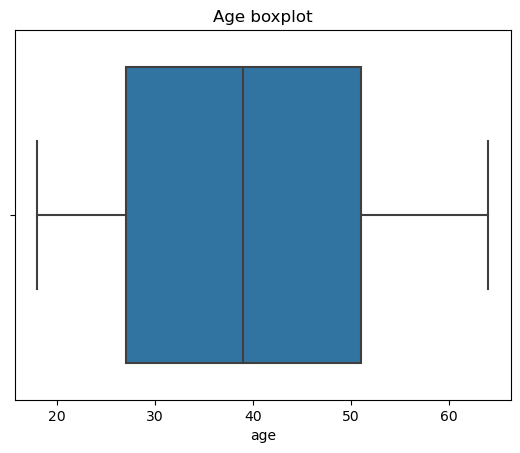

<Axes: title={'center': 'Age histogram'}, xlabel='age', ylabel='Count'>

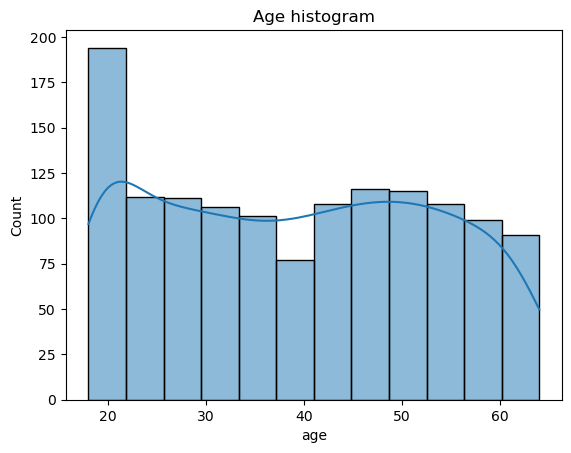

In [643]:
plt.title('Age boxplot')
sns.boxplot(data=insurance, x='age')
plt.show()
plt.title('Age histogram')
sns.histplot(data=insurance, x='age', kde=True)

- There are no outliers in the Age column.
- Most people are in the range of 18 to ~22.

### BMI Column

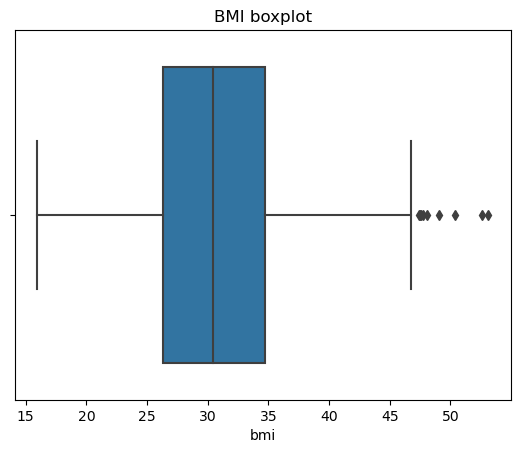

<Axes: title={'center': 'BMI histogram'}, xlabel='bmi', ylabel='Count'>

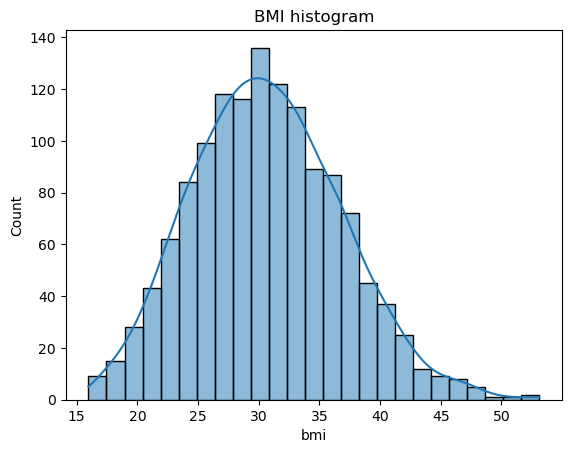

In [644]:
plt.title('BMI boxplot')
sns.boxplot(data=insurance, x='bmi')
plt.show()
plt.title('BMI histogram')
sns.histplot(data=insurance, x='bmi', kde=True)

In [645]:
(insurance['bmi'] > 48).sum()

5

In [646]:
insurance.drop(insurance[insurance['bmi'] >= 48].index, inplace=True)

<Axes: title={'center': 'BMI boxplot'}, xlabel='bmi'>

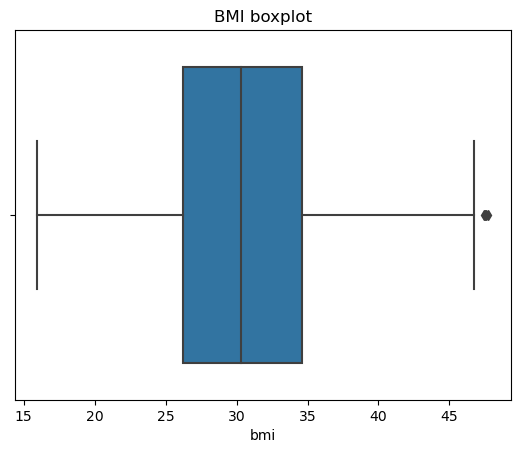

In [647]:
plt.title('BMI boxplot')
sns.boxplot(data=insurance, x='bmi')

- BMI is normally distributed.
- BMI has around 5 outliers after ~48, so they are safe to drop.

### Children Column

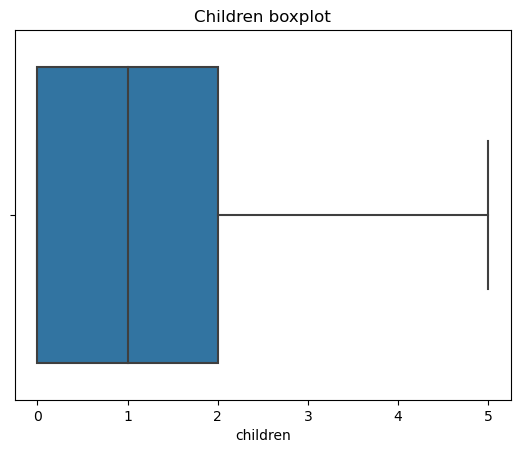

<Axes: title={'center': 'Children histogram'}, xlabel='children', ylabel='Count'>

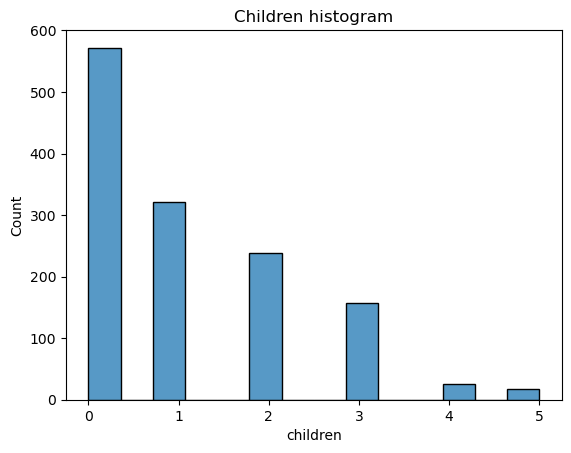

In [648]:
plt.title('Children boxplot')
sns.boxplot(data=insurance, x='children')
plt.show()
plt.title('Children histogram')
sns.histplot(data=insurance, x='children')

- There are no outliers in the children column.
- Majority of people have 0 to 3 children.

### Charges Column

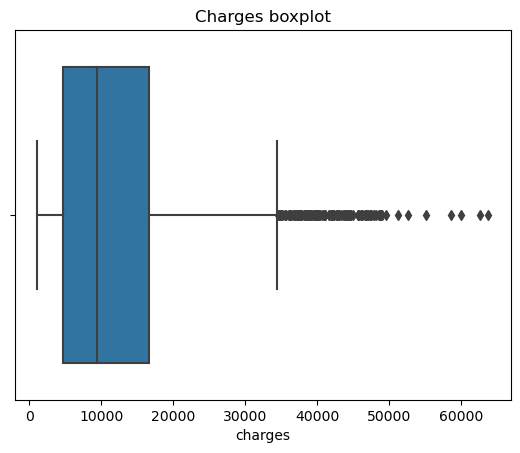

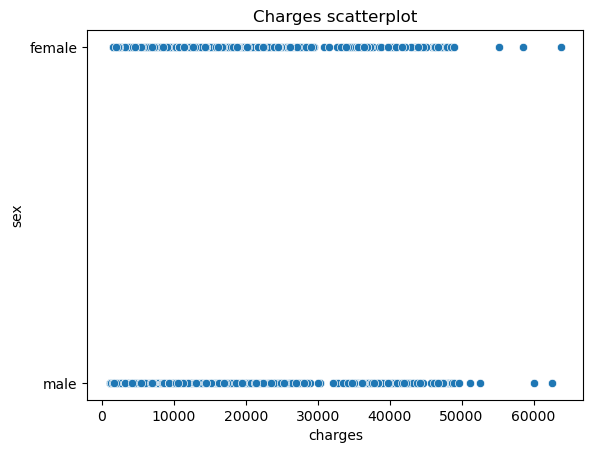

<Axes: title={'center': 'Charges histogram'}, xlabel='charges', ylabel='Count'>

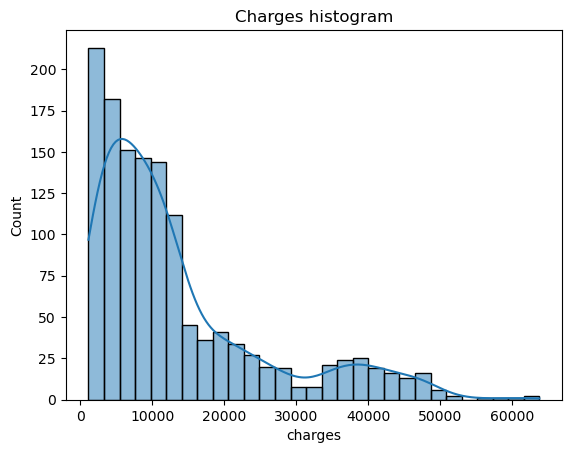

In [649]:
plt.title('Charges boxplot')
sns.boxplot(data=insurance, x='charges')
plt.show()
plt.title('Charges scatterplot')
sns.scatterplot(data=insurance, x='charges', y='sex')
plt.show()
plt.title('Charges histogram')
sns.histplot(data=insurance, x='charges', kde=True)

In [650]:
(insurance['charges'] > 50000).sum() * 100 / insurance.shape[0]

0.5251312828207052

In [651]:
insurance.drop(insurance[insurance['charges'] > 50000].index, inplace=True)

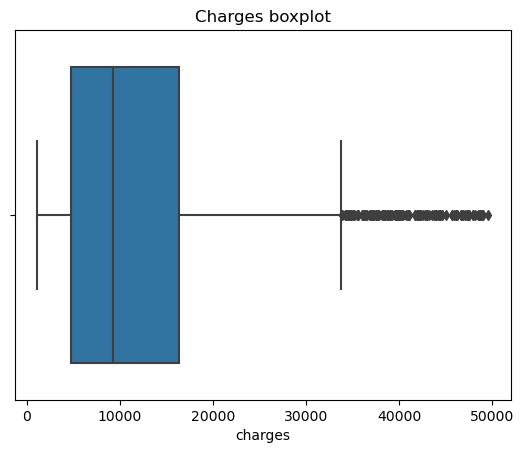

<Axes: title={'center': 'Charges scatterplot'}, xlabel='charges', ylabel='sex'>

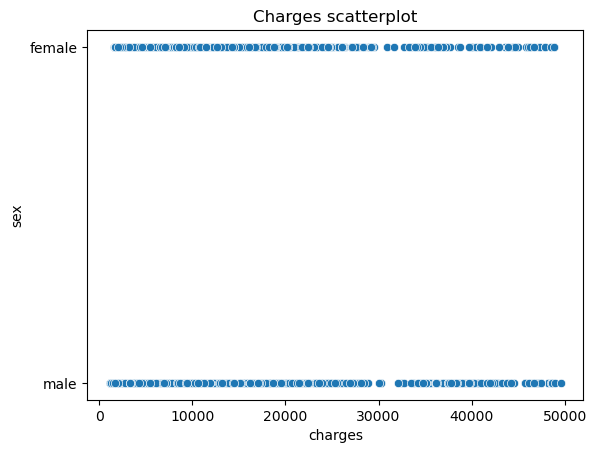

In [652]:
plt.title('Charges boxplot')
sns.boxplot(data=insurance, x='charges')
plt.show()
plt.title('Charges scatterplot')
sns.scatterplot(data=insurance, x='charges', y='sex')

- There are some outliers in the charges column.
- We can drop outliers more than 50K as they represent a very small percentage.
- Values less than 50K aren't _really_ outliers according to the scatter plot.

### Sex Column

In [653]:
insurance['sex'].unique()

array(['female', 'male'], dtype=object)

<Axes: title={'center': 'Sex histogram'}, xlabel='sex', ylabel='count'>

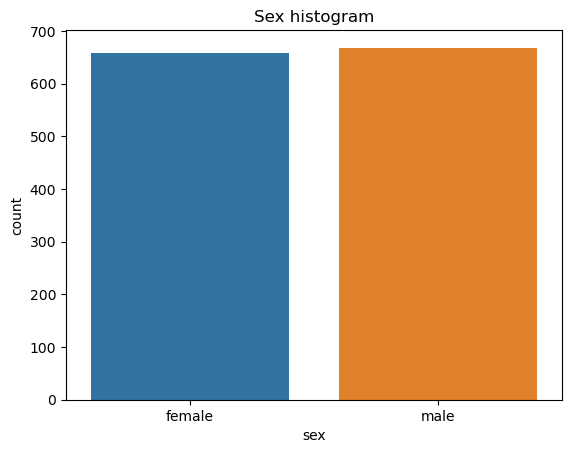

In [654]:
plt.title('Sex histogram')
sns.countplot(data=insurance, x='sex')

In [655]:
# One-Hot Encoding
insurance = insurance.join(pd.get_dummies(insurance['sex']))
insurance.drop(columns=['sex'], inplace=True)

- Data in the sex column doesn't include any weird values.
- Data is distributed in a pretty much equal way.
- Since sex has only 2 categories, I encoded it using One-Hot encoding.

### Smoker Column

In [656]:
insurance['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [657]:
# Manually encode smoker values. Yes -> 1, No -> 0
insurance['smoker'] = insurance['smoker'].replace(['yes', 'no'], [1, 0])

In [658]:
insurance['smoker'].value_counts()

0    1060
1     266
Name: smoker, dtype: int64

- ~80% of the people aren't smokers.
- We only have "yes" and "no" values, so I encoded them manually as 1 and 0 respectively.

### Region Column

In [659]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [660]:
insurance['region'].value_counts() * 100 / insurance.shape[0]

southeast    26.998492
southwest    24.358974
northwest    24.358974
northeast    24.283560
Name: region, dtype: float64

In [661]:
insurance = insurance.join(pd.get_dummies(insurance['region']))
insurance.drop(columns=['region'], inplace=True)
insurance.head(3)

,age,bmi,children,smoker,charges,female,male,northeast,northwest,southeast,southwest
0,19,27.90,0,1,16884.9240,1,0,0,0,0,1
1,18,33.77,1,0,1725.5523,0,1,0,0,1,0
2,28,33.00,3,0,4449.4620,0,1,0,0,1,0


- Data is distributed equally between 4 different regions.
- Since the number of regions is small, I used One-Hot encoding.

## Exploratory Data Analysis

### Which Numerical Features Affect the Medical Insurance Cost?

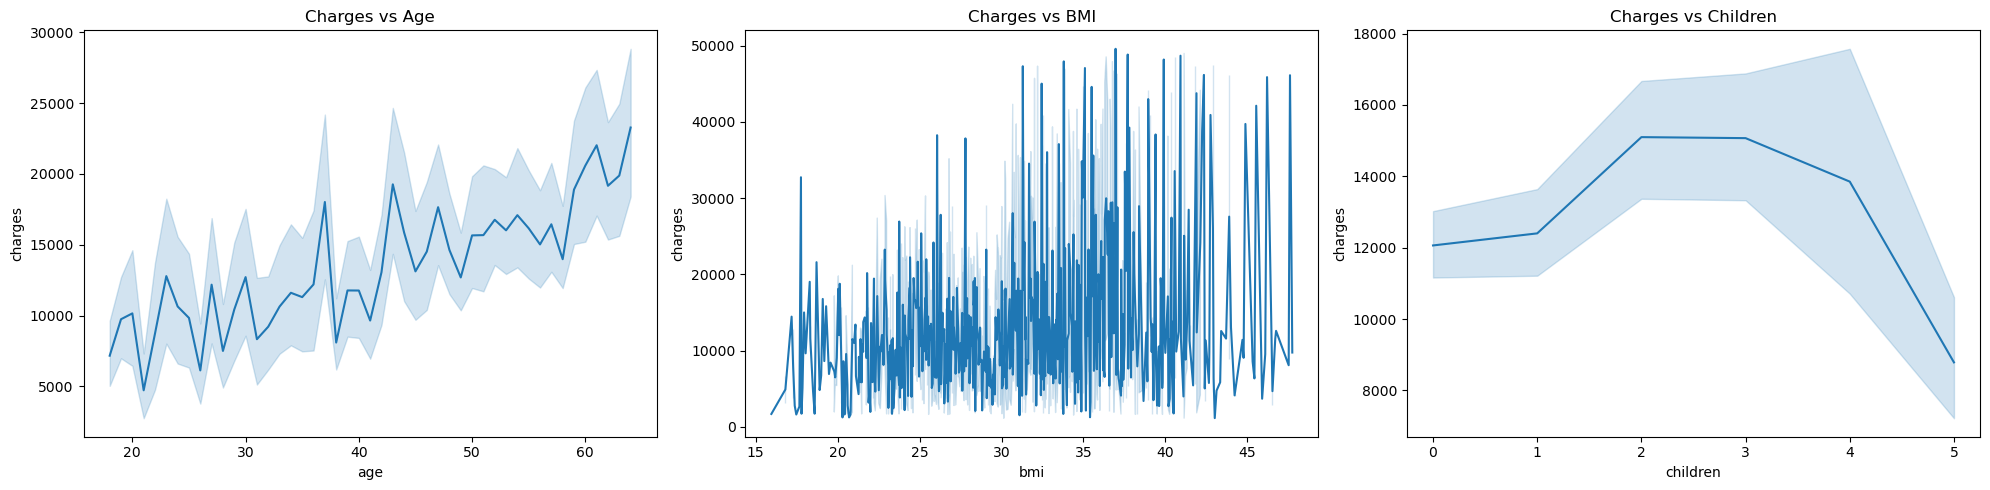

In [662]:
columns = ['Age', 'BMI', 'Children']
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
for i in range(len(columns)):
  col = columns[i]
  ax = axs[i]
  ax.set_title(f'Charges vs {col}')
  sns.lineplot(data=insurance, x=col.lower(), y='charges', ax=ax)
fig.tight_layout()

- We can clearly see that the cost is propotional to the **age**.
- The cost seems to increase while the number of children increases, but it then drops at 5 children; that can be a result of 4 and 5 children being a very small minority.
- There seams to be a pattern in BMI, the cost gets begger when the BMI increases but not as stable as the age.

### How Does Sex Affect the Medical Insurance Cost?

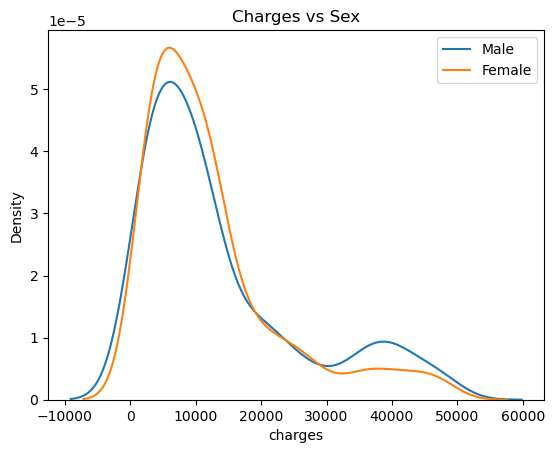

In [663]:
plt.title('Charges vs Sex')
sns.kdeplot(data=insurance[insurance['male'] == 1]['charges'], label='Male')
plt.legend()
sns.kdeplot(data=insurance[insurance['female'] == 1]['charges'], label='Female')
plt.legend()

- Both genders are very close in terms of the cost distribution.
- Cost for females tends to be less than males.

### How Does Smoking Affect the Medical Insurance Cost?

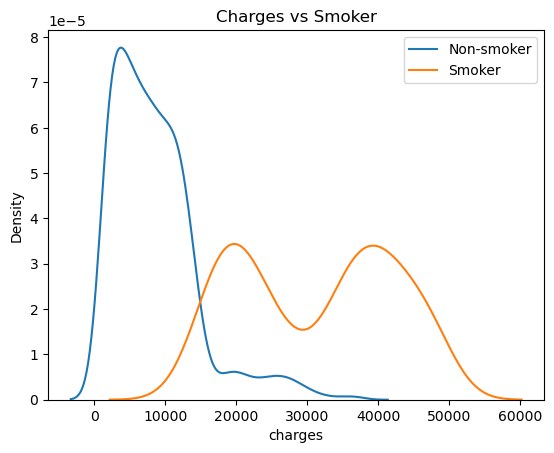

In [664]:
plt.title('Charges vs Smoker')
sns.kdeplot(data=insurance[insurance['smoker'] == 0]['charges'], label='Non-smoker')
plt.legend()
sns.kdeplot(data=insurance[insurance['smoker'] == 1]['charges'], label='Smoker')
plt.legend()

- Non-smokers tend to pay a lot less than smokers.

### How Does the Region Affect the Medical Insurance Cost?

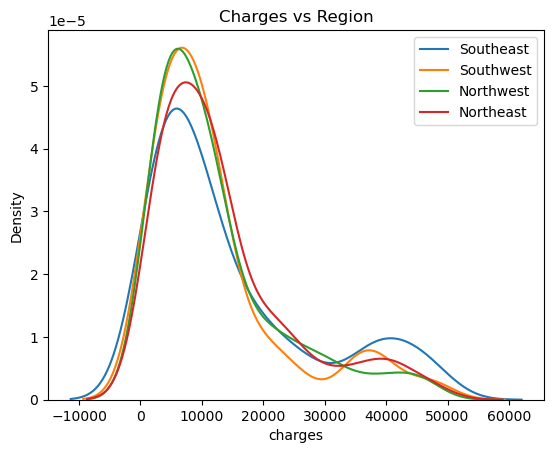

In [665]:
plt.title('Charges vs Region')
regions = ['southeast', 'southwest', 'northwest', 'northeast']
for region in regions:    
  sns.kdeplot(data=insurance[insurance[region] == 1]['charges'], label=region.capitalize())
  plt.legend()

- All regions are very close in terms of cost distribution.
- People in southwest and northwest regions tend to pay a bit less than others in northeast and southeast.

## Modeling

### Split Train and Test Data

In [666]:
# After several tries of traning the polynomial and linear regression models,
# it turns out age, BMI and is smoker are most effective features.
# Sex and region don't add much value to the accuracy of the model.
X = insurance[['age', 'bmi', 'smoker']].values
y = insurance['charges'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

### Linear Regression

In [667]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [668]:
y_prod = linear_regression.predict(X_test)
acc = 100 * r2_score(y_test, y_prod)
f'Linear Regression Accuracy: {np.round(acc, decimals=2)}%'

'Linear Regression Accuracy: 74.78%'

In [669]:
# After several tries, it turns out a degree of 8 (and 2) produce very good accuracy.
polynomial_regression = PolynomialFeatures(degree=8)
X_poly = polynomial_regression.fit_transform(X)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=5)
linear_polynomial_regression = LinearRegression()
linear_polynomial_regression.fit(X_poly_train, y_train)

LinearRegression()

In [670]:
y_prod_2 = linear_polynomial_regression.predict(X_poly_test)
acc = 100 * r2_score(y_test, y_prod_2)
f'Polynomial Regression Accuracy: {np.round(acc, decimals=2)}%'

'Polynomial Regression Accuracy: 86.7%'

<Axes: title={'center': 'Relation Between Predicted and Real Cost\nof the Polynomial Linear Regression Model'}, xlabel='Real Cost', ylabel='Predicted Cost'>

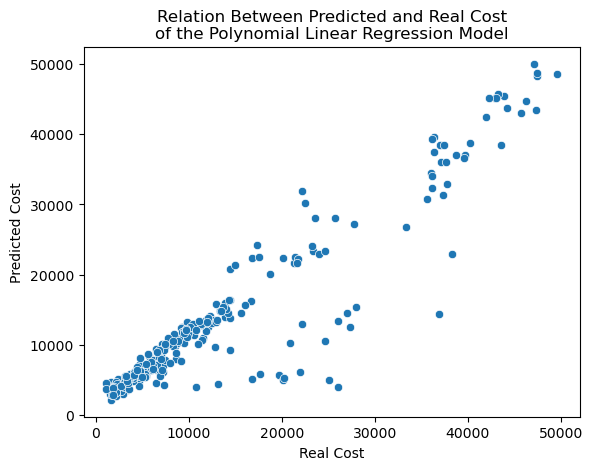

In [671]:
plt.title('Relation Between Predicted and Real Cost\nof the Polynomial Linear Regression Model')
plt.xlabel('Real Cost')
plt.ylabel('Predicted Cost')
sns.scatterplot(x=y_test, y=y_prod_2)